# 데이터 전처리

In [29]:
import os 
import urllib
import cv2
import numpy as np
import pixellib
from importlib.metadata import version
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

이미지 준비

In [2]:
cat_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/고양이.png'
cat_orig = cv2.imread(cat_path)

cat_2_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/고양이2.jpg'
cat_2_orig = cv2.imread(cat_2_path)

gold_river_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/금강선.jpg'
gold_river_orig = cv2.imread(gold_river_path)

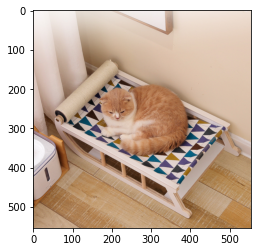

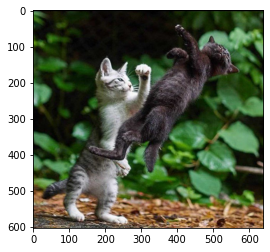

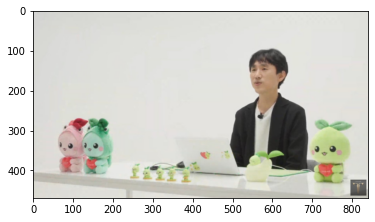

In [3]:
plt.imshow(cv2.cvtColor(cat_orig, cv2.COLOR_BGR2RGB))
plt. show()

plt.imshow(cv2.cvtColor(cat_2_orig, cv2.COLOR_BGR2RGB))
plt. show()

plt.imshow(cv2.cvtColor(gold_river_orig, cv2.COLOR_BGR2RGB))
plt.show()
#귀여운 고양이 이미지 2개와 사람의 모습으로 강림한 신의 모습이다.

Segmantation Model 준비

In [4]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url =  'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f12dba5db80>)

In [5]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [6]:
segvalues, output = model.segmentAsPascalvoc(cat_path)
segvalues_2, output_2 = model.segmentAsPascalvoc(cat_2_path)
segvalues_3, output_3 = model.segmentAsPascalvoc(gold_river_path)

In [7]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']

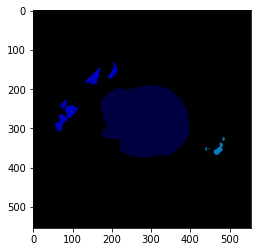

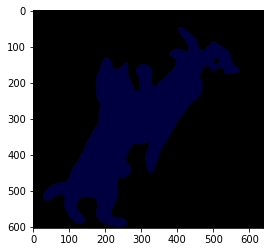

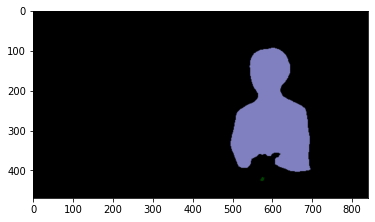

In [8]:
plt.imshow(output)
plt.show()

plt.imshow(output_2)
plt.show()

plt.imshow(output_3)
plt.show()

In [9]:
segvalues

{'class_ids': array([ 0,  8,  9, 11]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [10]:
segvalues_2

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [11]:
segvalues_3

{'class_ids': array([ 0, 15, 16]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [12]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
chair
diningtable


In [13]:
for class_id in segvalues_2['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [14]:
for class_id in segvalues_3['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
pottedplant


In [15]:
#컬러맵 생성
colormap = np.zeros((256,3), dtype = int)
ind = np.arange(256, dtype = int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel)& 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [16]:
colormap[8] #고양이 color map

array([64,  0,  0])

In [17]:
colormap[15] #사람 color map

array([192, 128, 128])

In [18]:
seg_color_cat = (0,0,64)
seg_color_human = (128,128,192)

(554, 554)


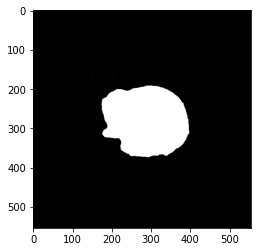

In [19]:
seg_map = np.all(output == seg_color_cat, axis = -1)
print(seg_map.shape)
plt.imshow(seg_map, cmap ='gray')
plt.show()

(604, 640)


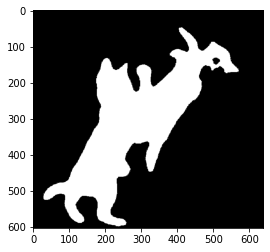

In [20]:
seg_map_2 = np.all(output_2 == seg_color_cat, axis = -1)
print(seg_map_2.shape)
plt.imshow(seg_map_2, cmap ='gray')
plt.show()

(469, 840)


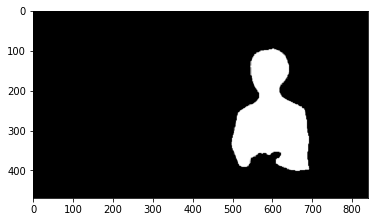

In [21]:
seg_map_3 = np.all(output_3 == seg_color_human, axis = -1)
print(seg_map_3.shape)
plt.imshow(seg_map_3, cmap = 'gray')
plt.show()

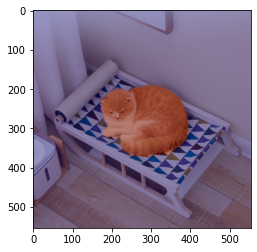

In [33]:
cat_show = cat_orig.copy()

img_mask = seg_map.astype(np.uint8)*255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

cat_show = cv2.addWeighted(cat_show, 0.6, color_mask, 0.35, 0.0)

plt.imshow(cv2.cvtColor(cat_show, cv2.COLOR_BGR2RGB))
plt.show()

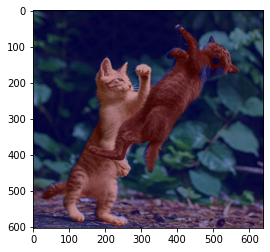

In [34]:
cat_2_show = cat_2_orig.copy()

img_mask_2 = seg_map_2.astype(np.uint8)*255
color_mask_2 = cv2.applyColorMap(img_mask_2, cv2.COLORMAP_JET)

cat_2_show = cv2.addWeighted(cat_2_show, 0.6, color_mask_2, 0.4, 0.0)

plt.imshow(cv2.cvtColor(cat_2_show, cv2.COLOR_BGR2RGB))
plt.show()

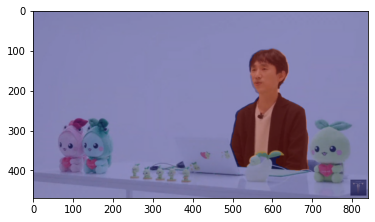

In [35]:
gold_river_show = gold_river_orig.copy()

img_mask_3 = seg_map_3.astype(np.uint8)*255
color_mask_3 = cv2.applyColorMap(img_mask_3, cv2.COLORMAP_JET)

gold_river_show = cv2.addWeighted(gold_river_show, 0.6, color_mask_3, 0.4, 0.0)

plt.imshow(cv2.cvtColor(gold_river_show, cv2.COLOR_BGR2RGB))
plt.show()

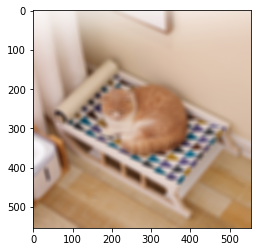

In [36]:
cat_orig_blur = cv2.blur(cat_orig, (13,13))
plt.imshow(cv2.cvtColor(cat_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

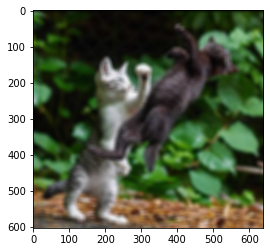

In [26]:
cat_2_orig_blur = cv2.blur(cat_2_orig, (13,13))
plt.imshow(cv2.cvtColor(cat_2_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

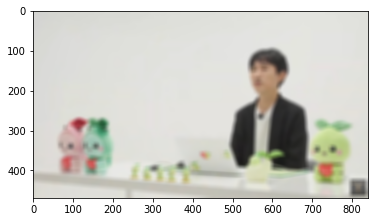

In [27]:
gold_river_orig_blur = cv2.blur(gold_river_orig, (13,13))
plt.imshow(cv2.cvtColor(gold_river_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

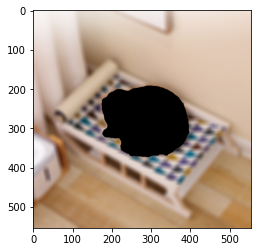

In [37]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(cat_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

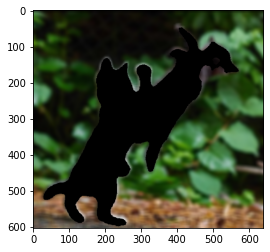

In [38]:
img_mask_color_2 = cv2.cvtColor(img_mask_2, cv2.COLOR_GRAY2BGR)

img_bg_mask_2 = cv2.bitwise_not(img_mask_color_2)

img_bg_blur_2 = cv2.bitwise_and(cat_2_orig_blur, img_bg_mask_2)
plt.imshow(cv2.cvtColor(img_bg_blur_2, cv2.COLOR_BGR2RGB))
plt.show()

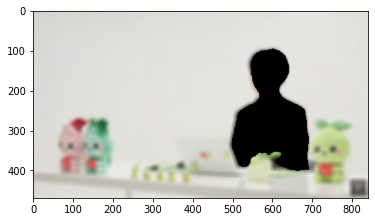

In [39]:
img_mask_color_3 = cv2.cvtColor(img_mask_3, cv2.COLOR_GRAY2BGR)

img_bg_mask_3 = cv2.bitwise_not(img_mask_color_3)

img_bg_blur_3 = cv2.bitwise_and(gold_river_orig_blur, img_bg_mask_3)
plt.imshow(cv2.cvtColor(img_bg_blur_3, cv2.COLOR_BGR2RGB))
plt.show()

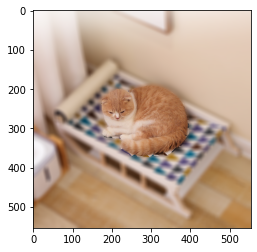

In [40]:
img_concat = np.where(img_mask_color == 255, cat_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

문제점: 고양이가 앉아 있는 침대 주변은 흐림 처리가 되지 않았다.

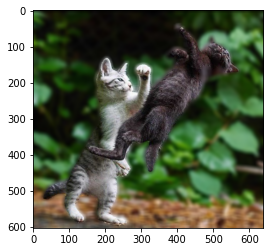

In [41]:
img_concat_2 = np.where(img_mask_color_2 == 255, cat_2_orig, img_bg_blur_2)
plt.imshow(cv2.cvtColor(img_concat_2, cv2.COLOR_BGR2RGB))
plt.show()

문제점: 보이지 않음 나름 잘 나온 것 같다.

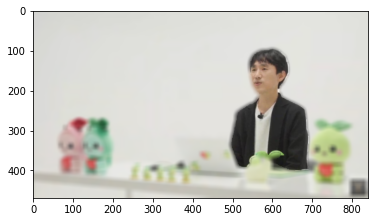

In [42]:
img_concat_3 = np.where(img_mask_color_3 == 255, gold_river_orig, img_bg_blur_3)
plt.imshow(cv2.cvtColor(img_concat_3, cv2.COLOR_BGR2RGB))
plt.show()

문제점: 사람의 형상이 좀 흐리고 뭔가 좀 전체적으로 흐림의 강도가 강해서 사진이 부자연스러워 보인다. 다만, 신의 모습은 확실히 강조되었다.

이러한 segmentation의 한계를 D-ToF 와 적외선 카메라를 사용해서 거리감과 온도가 따로 있는 물체를 찍을 때 segment를 좀 더 보완해서 딱 원하는 인물 또는 사물을 강조할 수 있는 사진을 찍을 수 있을 것 같다.